In [1]:
%cd ../..
# %pip install .
import time
from os import environ
# ego = Car on drivableRoad,
#         facing Range(-15, 15) deg relative to roadDirection,
#         with visibleDistance 50,
#         with viewAngle 135 deg

# point1 = OrientedPoint ahead of ego by Range(0, 40)
# Car at (point1 offset by Range(-1, 1) @ 0),
#     facing Range(-15, 15) deg relative to roadDirection



/home/yongming/workspace/research/apperception_new_local/apperception


In [2]:
environ['AP_PORT'] = str(input('port')) # README command uses port=25432

port25432


In [ ]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import os
import random

experiment_data_dir =  "data/nuscenes/experiment_data"
# experiment_data_dir = '/work/apperception/data/nuScenes/full-dataset-v1.0/Trainval/experiment_data'
def show_images(images, sample=None):
    if sample is not None:
        images = [i for i in images]
        random.shuffle(images)
        images = images[:sample]
    
    plt.figure(figsize=(60,30))
    columns = 3

    for i, image in enumerate(images):
        print("image", image)
        img = mpimg.imread(os.path.join(experiment_data_dir, image))
        print("loaded")
        plt.subplot(len(images) // columns + 1, columns, i + 1)
        plt.imshow(img)

In [4]:
#### First part of the query ####
from apperception.world import empty_world
# directly ingest the mini dataset and boston roadnetwork if needed
# from apperception.new_db import database
# database.reset()
# from benchmarks.ingest_scenic_data import ingest_data
# ingest_data()

name = 'ScenicWorld' # world name
world = empty_world(name=name)

### Query ###
from apperception.utils import F
# world = world.predicate(lambda obj: obj.object_type == 'vehicle')
def pred(obj1, cam):
    return (
        F.like(obj1.object_type, 'vehicle%') and
        F.facing_relative(cam.ego, F.road_direction(cam.ego, cam.timestamp), cam.timestamp) > -15 and
        F.facing_relative(cam.ego, F.road_direction(cam.ego, cam.timestamp), cam.timestamp) < 15 and
        F.view_angle(obj1, cam.ego, cam.timestamp) < 67.5 and
        F.distance(cam.ego, obj1, cam.timestamp) < 40 and
        F.facing_relative(obj1, F.road_direction(obj1.traj, cam.timestamp, cam.ego), cam.timestamp) > -15 and 
        F.facing_relative(obj1, F.road_direction(obj1.traj, cam.timestamp, cam.ego), cam.timestamp) < 15 and
        F.ahead(obj1, cam.ego, cam.timestamp)
    )
world = world.filter("lambda obj1, cam: " +
        "F.like(obj1.object_type, 'vehicle%') and " +
        "F.facing_relative(cam.ego, F.road_direction(cam.ego, cam.timestamp, cam.ego), cam.timestamp) > -15 and " +
        "F.facing_relative(cam.ego, F.road_direction(cam.ego, cam.timestamp, cam.ego), cam.timestamp) < 15 and " +
        "F.view_angle(obj1, cam.ego, cam.timestamp) < 67.5 and " +
        "F.distance(cam.ego, obj1, cam.timestamp) < 40 and " +
        "F.facing_relative(obj1, F.road_direction(obj1.traj, cam.timestamp, cam.ego), cam.timestamp) > -15 and " +
        "F.facing_relative(obj1, F.road_direction(obj1.traj, cam.timestamp, cam.ego), cam.timestamp) < 15 and " +
        "F.ahead(obj1, cam.ego, cam.timestamp)")

start = time.time()
# keys = world.get_traj_key()
id_time_camId_filename_1 = world.get_id_time_camId_filename(num_joined_tables=1)

end = time.time()
print(format(end-start))

execute: filter
execute: get_id_time_camId_filename
get_id_time_camId_filename 
        SELECT table_0.itemId, cameras.timestamp, cameras.cameraId, cameras.filename
        FROM (SELECT * FROM item_general_trajectory) as table_0
        
        JOIN Cameras USING (cameraId)
        WHERE ((table_0.objectType LIKE 'vehicle%') AND (facingRelative(Cameras.egoHeading, roadDirection(Cameras.egoTranslation, Cameras.timestamp, Cameras.egoHeading), Cameras.timestamp)>(-15)) AND (facingRelative(Cameras.egoHeading, roadDirection(Cameras.egoTranslation, Cameras.timestamp, Cameras.egoHeading), Cameras.timestamp)<15) AND (viewAngle(table_0.trajCentroids, Cameras.egoHeading, Cameras.egoTranslation, Cameras.timestamp)<67.5) AND (distance(Cameras.egoTranslation, table_0.trajCentroids, Cameras.timestamp)<40) AND (facingRelative(table_0.itemHeadings, roadDirection(table_0.trajCentroids, Cameras.timestamp, Cameras.egoHeading), Cameras.timestamp)>(-15)) AND (facingRelative(table_0.itemHeadings, roadDirec

In [ ]:
resultImages_1 = dict() # maping from image -> (itemId, timestamp, camId) that it was found at
for result in id_time_camId_filename_1:
    itemId, timestamp, camId, filename = result
    filename = filename.split("/")[-1] # use split so that prefix path is not included in filename
    resultImages_1[filename] = (itemId, timestamp, camId)

In [ ]:
show_images(list(resultImages_1.keys()))

In [ ]:
# ego = Car on drivableRoad,
#         facing Range(-15, 15) deg relative to roadDirection,
#         with visibleDistance 50,
#         with viewAngle 135 deg

# oppositeCar = Car offset by (Range(-10, -1), Range(0, 50)),
#     facing Range(140, 180) deg relative to ego.heading

# point2 = OrientedPoint ahead of oppositeCar by Range(0, 40)
# Car at (point2 offset by Range(-1, 1) @ 0),
#     facing Range(-15, 15) deg relative to roadDirection

In [7]:
### Second part of the query ###
from apperception.world import empty_world

name = 'ScenicWorld' # world name
world = empty_world(name=name)

### Query ###
from apperception.utils import F

world = world.filter("lambda obj1, obj2, cam: " +
        "F.facing_relative(cam.ego, F.road_direction(cam.ego, cam.timestamp, cam.ego), cam.timestamp) > -15 and " +
        "F.facing_relative(cam.ego, F.road_direction(cam.ego, cam.timestamp, cam.ego), cam.timestamp) < 15 and " +
#         "F.convert_camera(obj1, cam.ego, cam.timestamp) > [-10, 0] and " +
#         "F.convert_camera(obj1, cam.ego, cam.timestamp) < [-1, 50] and " +
        "F.facing_relative(obj1, cam.ego, cam.timestamp) > 140 and " + 
        "F.facing_relative(obj1, cam.ego, cam.timestamp) < 180 and " + 
        "F.like(obj2.object_type, 'vehicle%') and " +
        "F.view_angle(obj2, cam.ego, cam.timestamp) < 67.5 and " +
        "F.distance(obj1, obj2, cam.timestamp) < 40 and " +
        "F.facing_relative(obj2, F.road_direction(obj1.traj, cam.timestamp, cam.ego), cam.timestamp) > -15 and " +
        "F.facing_relative(obj2, F.road_direction(obj1.traj, cam.timestamp, cam.ego), cam.timestamp) < 15 and " +
        "F.ahead(obj1, cam.ego, cam.timestamp)")

start = time.time()
# keys = world.get_traj_key()
id_time_camId_filename_2 = world.get_id_time_camId_filename(num_joined_tables=1)

end = time.time()
print(format(end-start))

execute: filter
execute: get_id_time_camId_filename
get_id_time_camId_filename 
        SELECT table_0.itemId, cameras.timestamp, cameras.cameraId, cameras.filename
        FROM (SELECT * FROM item_general_trajectory) as table_0
        JOIN (SELECT * FROM item_general_trajectory) as table_1 USING (cameraId)
        JOIN Cameras USING (cameraId)
        WHERE ((facingRelative(Cameras.egoHeading, roadDirection(Cameras.egoTranslation, Cameras.timestamp, Cameras.egoHeading), Cameras.timestamp)>(-15)) AND (facingRelative(Cameras.egoHeading, roadDirection(Cameras.egoTranslation, Cameras.timestamp, Cameras.egoHeading), Cameras.timestamp)<15) AND (facingRelative(table_0.itemHeadings, Cameras.egoHeading, Cameras.timestamp)>140) AND (facingRelative(table_0.itemHeadings, Cameras.egoHeading, Cameras.timestamp)<180) AND (table_1.objectType LIKE 'vehicle%') AND (viewAngle(table_1.trajCentroids, Cameras.egoHeading, Cameras.egoTranslation, Cameras.timestamp)<67.5) AND (distance(table_0.trajCentroids,

In [8]:
resultImages_2 = dict() # maping from image -> (itemId, timestamp, camId) that it was found at
for result in id_time_camId_filename_2:
    itemId, timestamp, camId, filename = result
    filename = filename.split("/")[-1] # use split so that prefix path is not included in filename
    resultImages_2[filename] = (itemId, timestamp, camId)

image n008-2018-09-18-13-10-39-0400__CAM_FRONT__1537291142412404.jpg
loaded


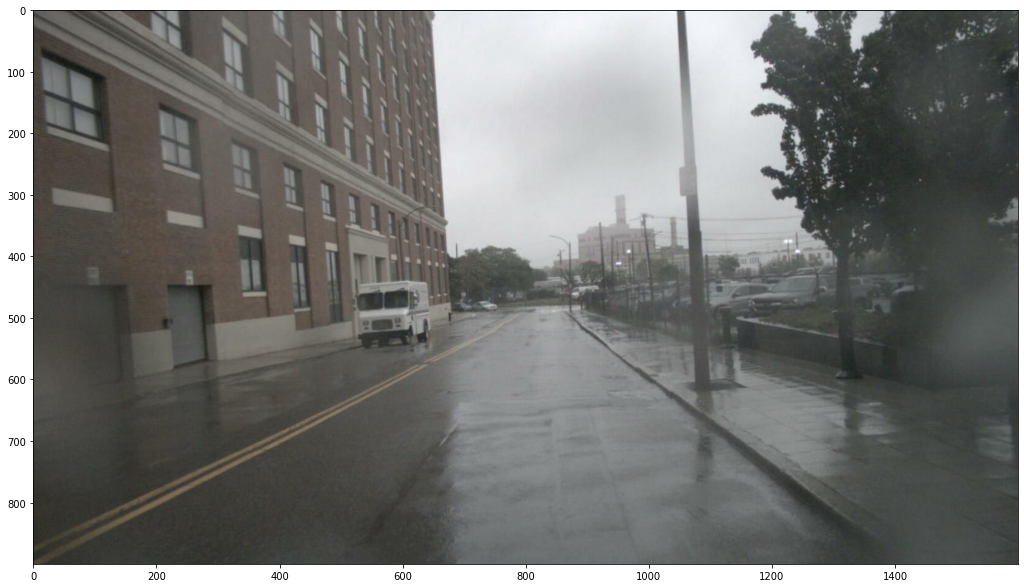

In [10]:
show_images(list(resultImages_2.keys()))